In [1]:
import arviz as az
import numpy as np
import pymc as pm

from matplotlib import pylab as plt
from scipy import stats

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data = np.array([1, 0, 1, 1, 1, 0, 1, 0, 1])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.


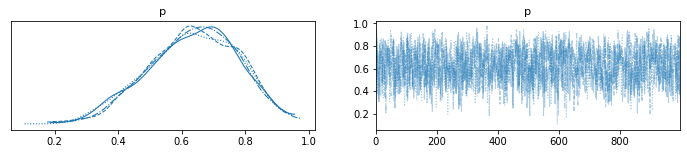

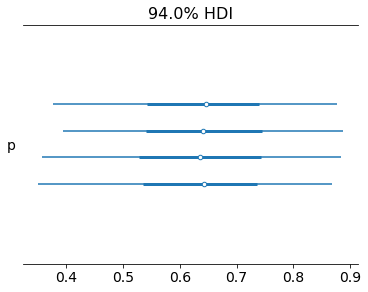

In [3]:
with pm.Model() as our_first_model:
    p = pm.Uniform("p")  # set the prior
    y = pm.Bernoulli("y", p=p, observed=data)  # set the posterior
    trace = pm.sample(1000, chains=4)  # get 1000 random_samples
    az.plot_trace(trace)
    az.plot_forest(trace, var_names=["p"])

In [23]:
trace['posterior'].p

<xarray.DataArray 'p' (chain: 4, draw: 1000)>
array([[0.50234874, 0.87203955, 0.94181646, ..., 0.86034958, 0.88685242,
        0.82930404],
       [0.6863981 , 0.7383462 , 0.50344107, ..., 0.63725207, 0.71512297,
        0.49147184],
       [0.59524689, 0.62203764, 0.70012527, ..., 0.83112037, 0.49412411,
        0.31192085],
       [0.78757305, 0.85524713, 0.77945488, ..., 0.37396745, 0.58467513,
        0.69096528]])
Coordinates:
  * chain    (chain) int32 0 1 2 3
  * draw     (draw) int32 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

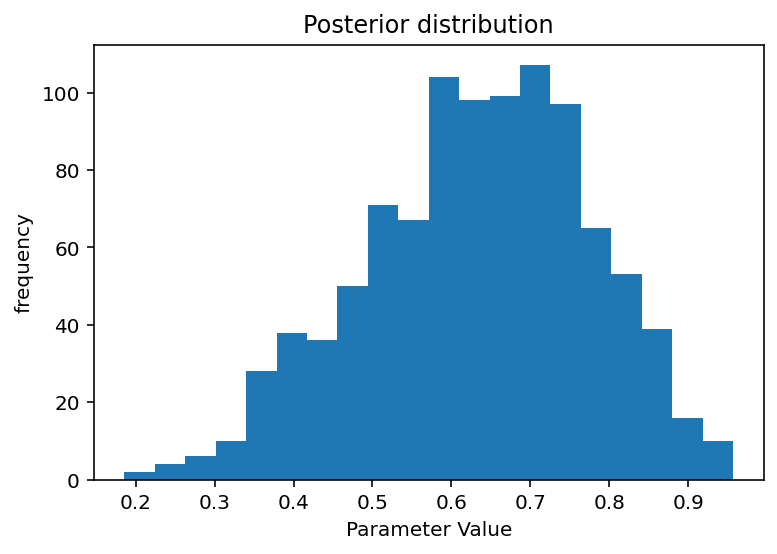

In [25]:
# plot the posterior
plt.hist(trace['posterior'].p[0], bins=20)
plt.title("Posterior distribution")
plt.ylabel("frequency")
plt.xlabel("Parameter Value");

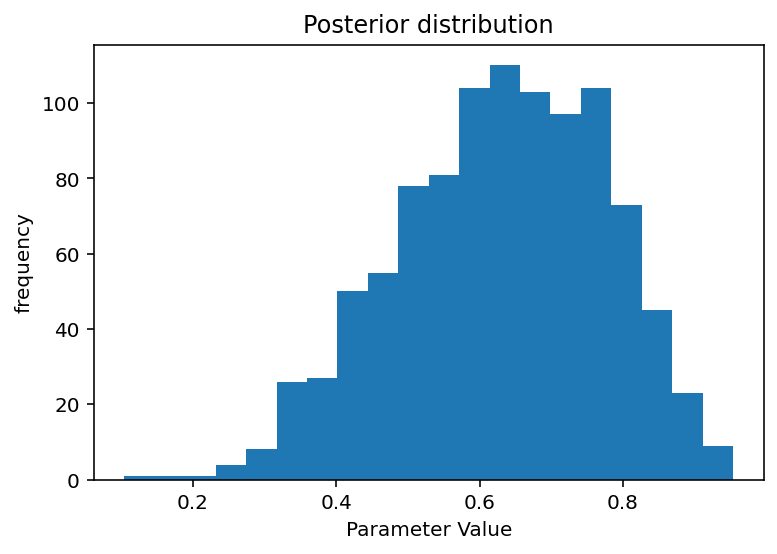

In [26]:
# plot the posterior
plt.hist(trace['posterior'].p[1], bins=20)
plt.title("Posterior distribution")
plt.ylabel("frequency")
plt.xlabel("Parameter Value");

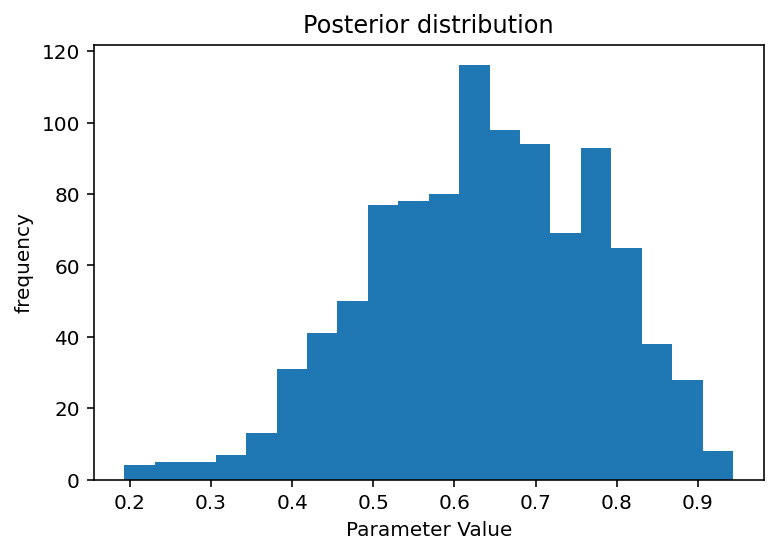

In [27]:
# plot the posterior
plt.hist(trace['posterior'].p[2], bins=20)
plt.title("Posterior distribution")
plt.ylabel("frequency")
plt.xlabel("Parameter Value");

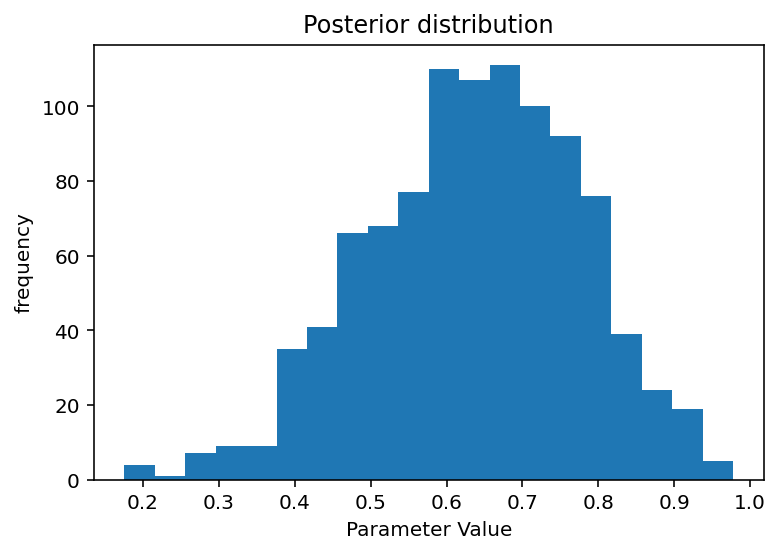

In [28]:
# plot the posterior
plt.hist(trace['posterior'].p[3], bins=20)
plt.title("Posterior distribution")
plt.ylabel("frequency")
plt.xlabel("Parameter Value");

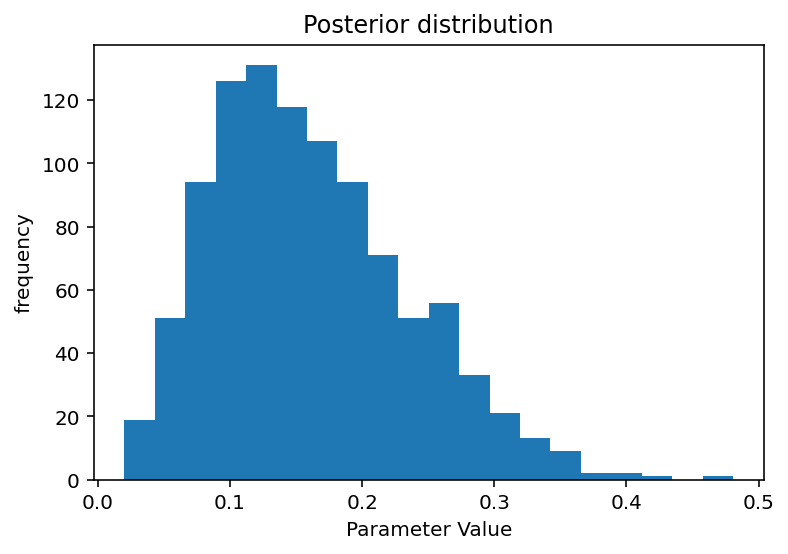

In [29]:
joint = trace['posterior'].p[3] * trace['posterior'].p[2] * trace['posterior'].p[1] * trace['posterior'].p[0]

# plot the posterior
plt.hist(joint, bins=20)
plt.title("Posterior distribution")
plt.ylabel("frequency")
plt.xlabel("Parameter Value");

array([[<AxesSubplot:title={'center':'p'}>]], dtype=object)

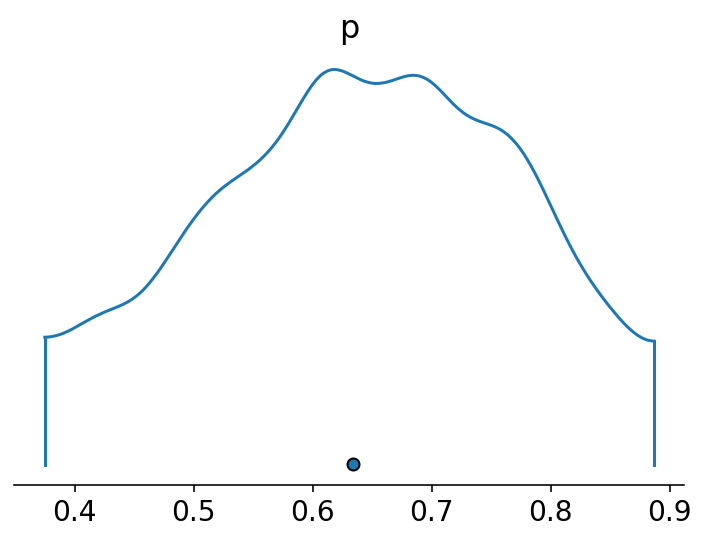

In [34]:
az.plot_density(trace)

Text(0.5, 1.0, 'Posterior plot')

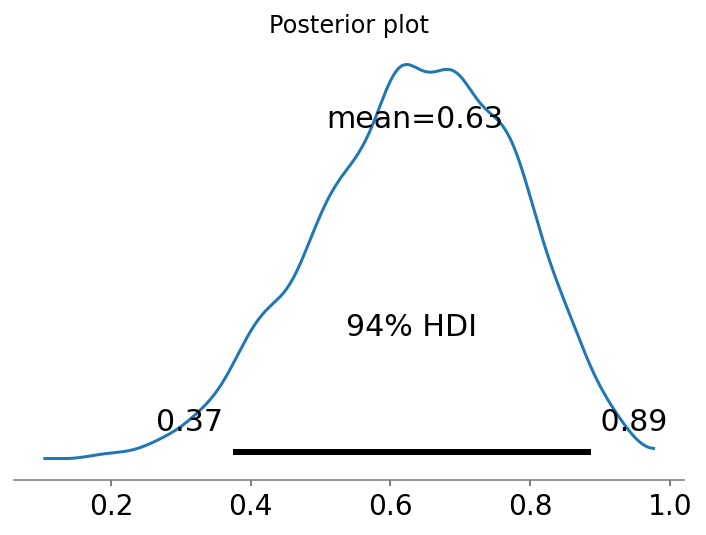

In [36]:
az.plot_posterior(trace)
plt.title('Posterior plot')

In [32]:
pm.__version__

'4.1.5'

3E1. How much posterior probability lies below p = 0.2?

In [45]:
samples = trace.posterior.p
np.sum( samples < 0.2) / samples.size

<xarray.DataArray 'p' ()>
array(0.002)

3E2. How much posterior probability lies above p = 0.8?

In [46]:
np.sum( samples > 0.8) / samples.size

<xarray.DataArray 'p' ()>
array(0.12)

3E3. How much posterior probability lies between p = 0.2 and p = 0.8?

In [49]:
(1 - np.sum(samples < 0.2) / samples.size) - np.sum(samples > 0.8) / samples.size # probability of being between 0.2 and 0.8

<xarray.DataArray 'p' ()>
array(0.878)

3E4. 20% of the posterior probability lies below which value of p?

3E5. 20% of the posterior probability lies above which value of p?